## Questions

1. What influences students performance the most?
2. How do boys and girls perform across states?
3. Do students from South Indian states really excel at Math and Science?

# pre-processing and loading  data

In [31]:
# loading dataset using pandas
import pandas as pd # aliasing pandas to pd
import numpy as np # aliasing numpy to np
import seaborn as sns #aliasing seaborn to sns
import matplotlib.pyplot as plt #aliasing matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

# suppress all warnings
import warnings
warnings.filterwarnings('ignore') 

#reading csv files  (datasets)
marks = pd.read_csv('nas-pupil-marks.csv')
labels = pd.read_csv('nas-labels.csv')
marks.head(15)
# labels

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33
5,11011001006,AP,1,2,3,3,1,5,2,3,...,1,4,3,2,4,4,NaN,23.33,NaN,30.00
6,11011001007,AP,1,2,3,4,2,2,2,1,...,3,4,4,4,4,4,40.74,70.00,NaN,NaN
7,11011001008,AP,1,2,2,0,2,4,2,1,...,3,4,3,3,3,4,NaN,26.67,NaN,22.92
8,11011001009,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,24.07,NaN,25.45,NaN
9,11011001010,AP,1,2,2,4,2,3,2,1,...,3,4,3,4,3,4,18.52,26.67,NaN,NaN


# Dealing with missing values

we had observed that there are missing values in the given dataset with value as "Nan" . Inorder to eliminate the missing  values we had to replace or delete the values

if we delete the values the size of the data is very less.so we should replace the missing values with some value.

So, we had replaced the missing values with the mean of respective column.

In [32]:
# filling missing values with mean() using fillna method in pandas.

marks['Maths %'].fillna(marks['Maths %'].mean(), inplace=True)
marks['Reading %'].fillna(marks['Reading %'].mean(), inplace=True)
marks['Science %'].fillna(marks['Science %'].mean(), inplace=True)
marks['Social %'].fillna(marks['Social %'].mean(), inplace=True)
# marks

## calculating the performance of students by taking the average of subjects

In [33]:

marks['mean']=(marks['Maths %']+marks['Reading %']+marks['Science %']+marks['Social %'])/4.0
# marks

As we are measurong the performance of the student by taking the mean of the subjects.we no longer need the values of the subjects. 

In [34]:
# dropping the columns unnecessary columns 
marks.drop(['Maths %'], axis = 1, inplace = True)
marks.drop(['Reading %'], axis = 1, inplace = True)
marks.drop(['Science %'], axis = 1, inplace = True)
marks.drop(['Social %'], axis = 1, inplace = True)


## finding the relation between the attributes with every attribute by generating the correlation matrix  

In [35]:
corr=marks.corr()
corr


,STUID,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,...,Observe experiments,Conduct experiments,Solve science problems,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,mean
STUID,1.000000,-0.032773,0.000411,0.007543,-0.018887,-0.200686,-0.072355,0.004060,0.005111,0.000226,...,0.000156,-0.062480,-0.047642,-0.034282,0.003050,-0.023914,0.000866,0.038330,-0.219252,0.046251
District,-0.032773,1.000000,0.012872,-0.060710,-0.005457,-0.083007,0.064492,0.013247,-0.015872,-0.055806,...,-0.040002,-0.025447,0.016796,-0.006837,-0.090632,0.014961,0.008188,0.005180,0.035028,0.026647
Gender,0.000411,0.012872,1.000000,-0.057400,0.023817,-0.000646,0.066806,0.006220,0.032358,0.034178,...,0.015993,0.001780,0.021859,0.004071,0.007805,-0.008271,0.025033,-0.103705,0.046400,0.023175
Age,0.007543,-0.060710,-0.057400,1.000000,-0.010430,0.094168,0.105916,0.018962,-0.051397,-0.045363,...,-0.003066,0.004722,-0.008164,0.002414,0.030008,-0.041679,-0.032727,-0.004161,0.062116,-0.040118
Category,-0.018887,-0.005457,0.023817,-0.010430,1.000000,0.024098,-0.075831,0.090949,0.103274,0.094960,...,0.056600,0.027244,0.056959,0.050513,0.036973,0.031062,0.022940,0.044414,0.039091,0.081462
Same language,-0.200686,-0.083007,-0.000646,0.094168,0.024098,1.000000,0.148897,0.097201,0.016991,0.024507,...,0.015028,-0.014354,0.024020,0.016634,0.003382,-0.015242,-0.026524,0.002751,0.109337,-0.009424
Siblings,-0.072355,0.064492,0.066806,0.105916,-0.075831,0.148897,1.000000,0.008384,-0.108523,-0.185142,...,-0.085023,-0.065085,-0.050442,-0.055831,-0.110480,-0.091279,-0.071205,-0.061259,0.115927,-0.053225
Handicap,0.004060,0.013247,0.006220,0.018962,0.090949,0.097201,0.008384,1.000000,0.078652,0.066061,...,0.083141,0.028374,0.076398,0.066480,0.061964,0.045564,0.053003,0.061750,0.038653,0.073623
Father edu,0.005111,-0.015872,0.032358,-0.051397,0.103274,0.016991,-0.108523,0.078652,1.000000,0.504731,...,0.064150,0.023385,0.051787,0.058364,0.081405,0.103977,0.063093,0.038487,0.034330,0.143962
Mother edu,0.000226,-0.055806,0.034178,-0.045363,0.094960,0.024507,-0.185142,0.066061,0.504731,1.000000,...,0.101869,0.061520,0.075469,0.082528,0.107619,0.136985,0.089612,0.046703,0.010543,0.128275


## generating the heatmap for the correlation matrix obtained.

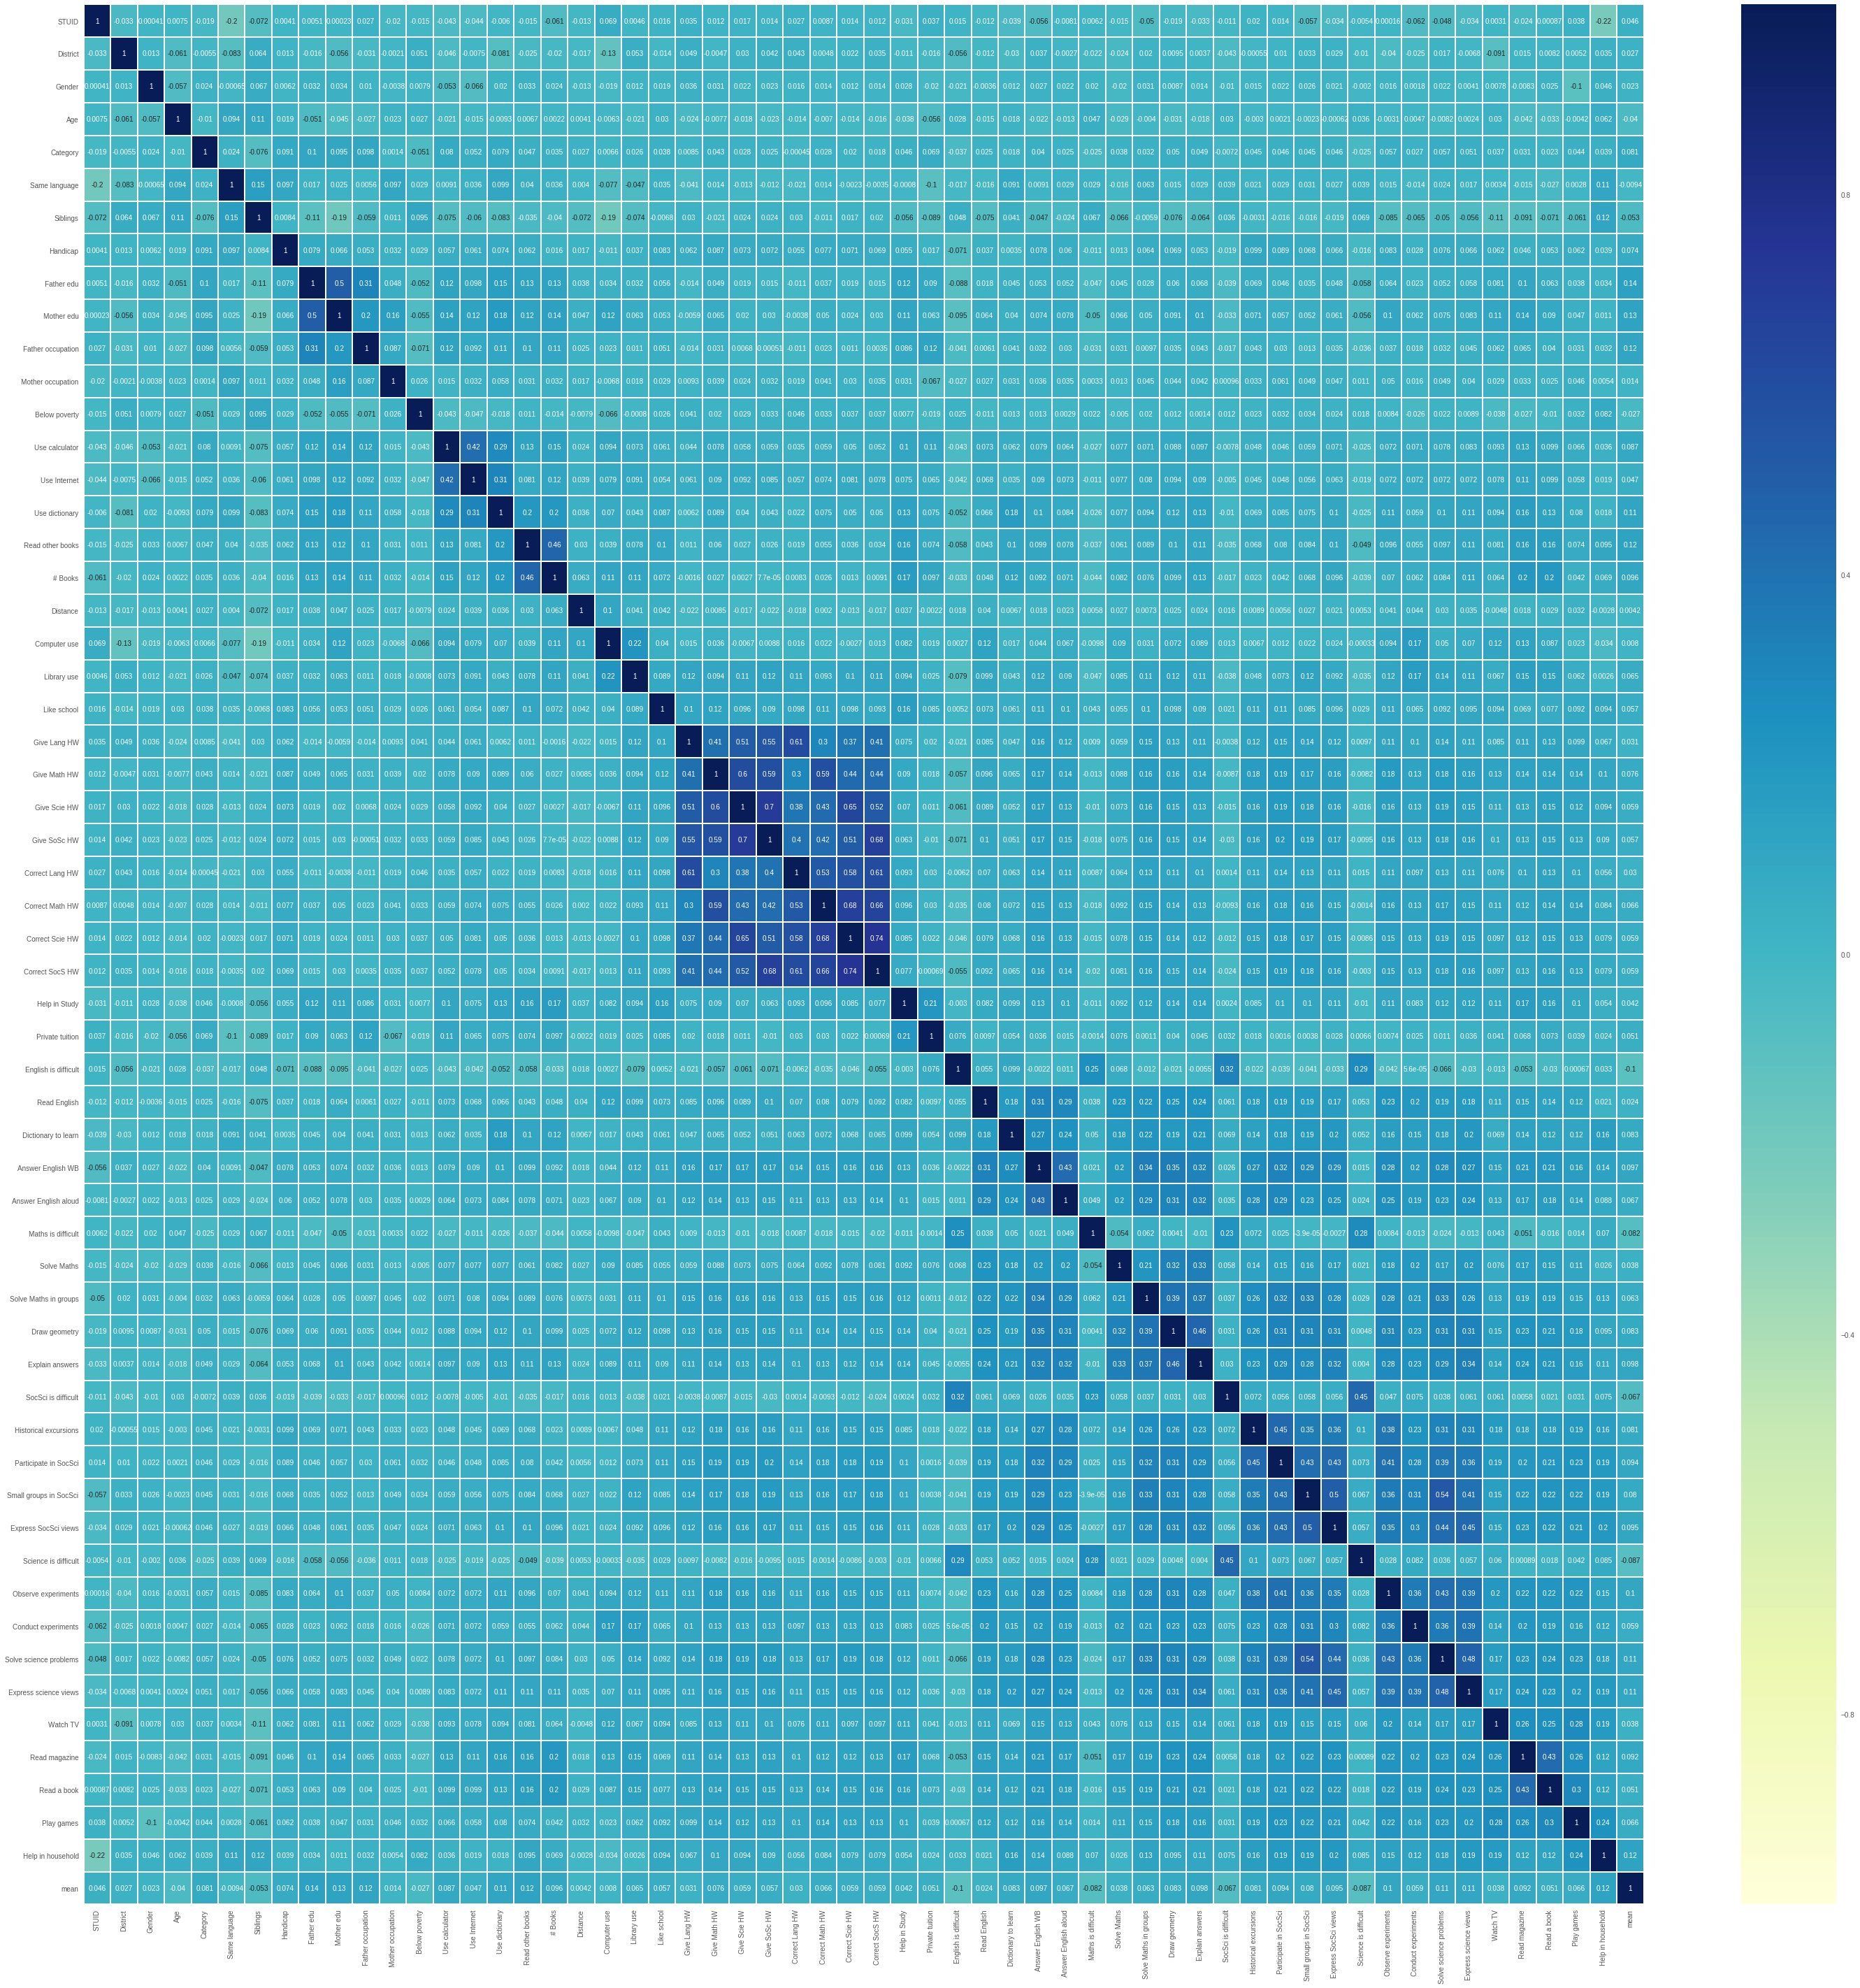

In [36]:
fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(corr,annot=True,linewidths=1,ax=ax,cmap="YlGnBu")

# Inorder to obtain the factors which influences the education we had to sort the results 

In [37]:
result=corr.sort_values(by=['mean'],ascending=[False])
result

,STUID,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,...,Observe experiments,Conduct experiments,Solve science problems,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,mean
mean,0.046251,0.026647,0.023175,-0.040118,0.081462,-0.009424,-0.053225,0.073623,0.143962,0.128275,...,0.099897,0.058739,0.105766,0.106649,0.037860,0.092479,0.051001,0.066391,0.120700,1.000000
Father edu,0.005111,-0.015872,0.032358,-0.051397,0.103274,0.016991,-0.108523,0.078652,1.000000,0.504731,...,0.064150,0.023385,0.051787,0.058364,0.081405,0.103977,0.063093,0.038487,0.034330,0.143962
Mother edu,0.000226,-0.055806,0.034178,-0.045363,0.094960,0.024507,-0.185142,0.066061,0.504731,1.000000,...,0.101869,0.061520,0.075469,0.082528,0.107619,0.136985,0.089612,0.046703,0.010543,0.128275
Help in household,-0.219252,0.035028,0.046400,0.062116,0.039091,0.109337,0.115927,0.038653,0.034330,0.010543,...,0.148058,0.117388,0.176443,0.187612,0.185730,0.121317,0.120472,0.238817,1.000000,0.120700
Read other books,-0.015139,-0.024758,0.032588,0.006707,0.046839,0.039907,-0.034805,0.062280,0.125127,0.122897,...,0.096492,0.054763,0.097347,0.106363,0.081342,0.162238,0.157717,0.073947,0.094680,0.119350
Father occupation,0.026842,-0.030577,0.010170,-0.027269,0.098173,0.005579,-0.059183,0.053270,0.306300,0.201833,...,0.036662,0.018203,0.031514,0.045223,0.061500,0.064706,0.040309,0.030635,0.032025,0.115481
Use dictionary,-0.006009,-0.080818,0.019704,-0.009331,0.078653,0.098544,-0.082728,0.074140,0.153483,0.183551,...,0.114183,0.058933,0.100933,0.114625,0.094410,0.160298,0.130860,0.080204,0.017852,0.111496
Express science views,-0.034282,-0.006837,0.004071,0.002414,0.050513,0.016634,-0.055831,0.066480,0.058364,0.082528,...,0.391010,0.390690,0.482309,1.000000,0.167332,0.236738,0.233330,0.204906,0.187612,0.106649
Solve science problems,-0.047642,0.016796,0.021859,-0.008164,0.056959,0.024020,-0.050442,0.076398,0.051787,0.075469,...,0.426469,0.359103,1.000000,0.482309,0.171326,0.234546,0.237517,0.225996,0.176443,0.105766
Observe experiments,0.000156,-0.040002,0.015993,-0.003066,0.056600,0.015028,-0.085023,0.083141,0.064150,0.101869,...,1.000000,0.357626,0.426469,0.391010,0.196285,0.219903,0.217660,0.216884,0.148058,0.099897


## top 5 factors which influence student performance most are

1. Father edu
2. Mother edu
3. Help in household
4. Read other books
5. Father occupation



#  2.How do boys and girls perform across states?

It can be said that in most of the states girls perform more than boys.

But it is not same in all cases , there may be chances  vary in  girls to boys ratio.


In [38]:
marks = pd.read_csv('nas-pupil-marks.csv')
marks['Maths %'].fillna(0, inplace=True)
marks['Reading %'].fillna(0, inplace=True)
marks['Science %'].fillna(0, inplace=True)
marks['Social %'].fillna(0, inplace=True)
marks['performance']=(marks['Maths %']+marks['Reading %']+marks['Science %']+marks['Social %'])/4.0
# marks

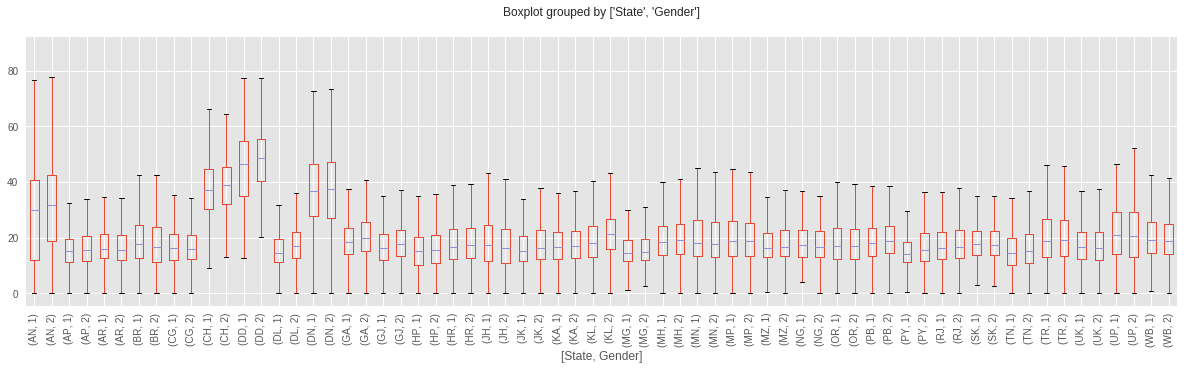

In [39]:
marks_gender = marks
marks_gender =marks_gender[marks_gender["Gender"]!=0]
#plotting the graph by grouping statewise and by gender using boxplot method
marks_gender.boxplot(column="performance", by=["State","Gender"], figsize=(20, 5))
plt.xticks(rotation="vertical")
plt.title("")
plt.show()

# Do students from South Indian states really excel at Math and Science?

we  had  considered south states as ("Andhra Pradesh", "Kerala", "Karnataka" and "Tamil Nadu") . 
Meanwhile remaining  states are referred to "remainingStates". 


The performance score for 'Science and Math' is defined as the mean value of both 'Science' and 'Math'.

In [40]:
marks['math_sci'] = marks[['Maths %','Science %']].apply(np.nanmean,axis=1)
# marks

we are processing the data for analysis  as our requirement.

By creating dataframe(southData) with ('State','Maths %','Science %','math_sci') as cloumns.

In [41]:
southData = marks[['State','Maths %','Science %','math_sci']].dropna(subset=['Maths %','Science %'])
southData.describe()

,Maths %,Science %,math_sci
count,185348.000000,185348.000000,185348.000000
mean,16.123424,17.876862,17.000143
std,19.731950,20.987438,11.312833
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.715000
50%,0.000000,0.000000,15.180000
75%,27.780000,33.930000,22.320000
max,100.000000,100.000000,94.675000


Inorder to perform analysis we had to divide the south states with remaining country.



In [42]:
# dividing south states from rest of the country
states = list(southData["State"].unique())
southStates = ["KL", "AP","TN","KA"]
remainingStates =[]
for x in (states):
    if x not in southStates:
        remainingStates.append(x)
remainingStates
southData["isSouth"] = southData["State"].isin(southStates)

# function to add a new column "south
def southOrRemaining(southData,southStates):
    lst = []
    for i in range(southData.shape[0]):
        state = southData.iloc[i]["State"]
        if state in southStates:
            lst.append(state)
        else:
            lst.append("Remaining")
    return lst
southData["south_or_remaining"] = southOrRemaining(southData,southStates)
# southData.tail()

### By above piece of code we will obtain the data with south states and non south states clearly

we can do analysis by drawing the boxplot south states and remaining states

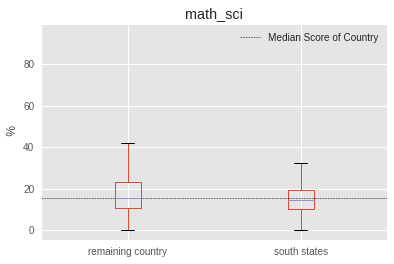

In [43]:
for factor in ["math_sci"]:
    fig = southData.boxplot(column = factor, by ="isSouth")
    plt.axhline(southData[factor].median(), color='k', linewidth = 0.5, linestyle ="--",\
                label="Median Score of Country")
    plt.ylabel(" %")
    fig.set_xticklabels(["remaining country","south states"])
    plt.suptitle("")
    plt.xlabel("")
    plt.legend()
    plt.show()
#     print "---------------------------------------------"

we can clearly state that south states doesn't excel in math and science when compared t